In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [233]:
def function(x):
    return (x - 3)* (x + 1)

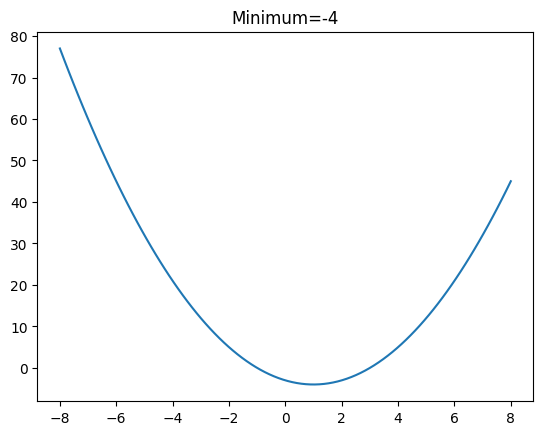

In [296]:
X = np.linspace(-8, 8, 100)
y = function(X)
minimum = min(y)
plt.title(f'Minimum={round(minimum)}')
plt.plot(X, y)
plt.show()

## Kodowanie
Kodowanie binarne przypisjue każdej jednostce ciąg bitów reprezentujący liczbę z przedziału $<-8; 8>$.

In [237]:
def encode(x):
    return format(int((x+8)*1000), 'b')


def decode(binary):
    return int(binary, 2) // 1000 - 8

## Mutacja
Mutacja polega na zmianie losowaego bitu u danej jednostki.

In [358]:
def mutate(binary):
    try:
        mutation_point = np.random.randint(0, len(binary)-1)
    except:
        mutation_point  = len(binary) // 2
    if binary[mutation_point] == '0':
        binary = binary[:mutation_point] + '1' + binary[mutation_point+1:]
    else:
        binary = binary[:mutation_point] + '0' + binary[mutation_point+1:]
    return binary

## Krzyżowanie
W celu skrzyżowania dwóch osobników losowa bybieram punkt krzyżowy w którym przetniemy oba chromosomy i zmieszamy w ten sposób dwa osobniki.

In [359]:
def crossover(binary1, binary2):
    crossover_point = np.random.randint(0, len(binary1)-1)
    new_binary1 = binary1[:crossover_point] + binary2[crossover_point:]
    new_binary2 = binary2[:crossover_point] + binary1[crossover_point:]
    return new_binary1, new_binary2

In [367]:
def gen_alg(num_iterations, population_size, crossover_rate, mutation_rate):
    population = [encode(np.random.randint(-8, 8)) for _ in range(population_size)]
    values = [decode(binary) for binary in population]
    best_value = min(values, key=function)
    best_binary = population[values.index(best_value)]
    best_values = [best_value]
    
    best_values_gen = [best_value]

    for i in range(num_iterations):
        new_population = []
        for j in range(len(population) // 2):
            # selekcja
            random.shuffle(population)
            parent1, parent2 = population[0], population[1]
            # krzyżowanie
            if random.random() <= crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                new_population.append(child1)
                new_population.append(child2)
            else:
                new_population.append(population[j])
                new_population.append(population[j])
        
        # mutacja
        for j in range(len(population)):
            if random.random() < mutation_rate:
                population[j] = mutate(population[j])

        # Aktualizacja najlepszej wartości
        values = [decode(binary) for binary in population]
        current_best_value = min(values, key=function)
        if current_best_value < best_value:
            best_value = current_best_value
            best_binary = population[values.index(best_value)]
        best_values_gen.append(best_value)

    best_values = [function(value) for value in best_values_gen]
    # Wizualizacja
    print('Najlepsza wartość genetyczna: ', best_value)
    print('Wartość f(x): ', function(best_value))
    plt.plot(best_values_gen)
    plt.xlabel('Iteracje')
    plt.ylabel('Wartość minimum')
    plt.show()

Najlepsza wartość genetyczna:  -3
Wartość f(x):  12


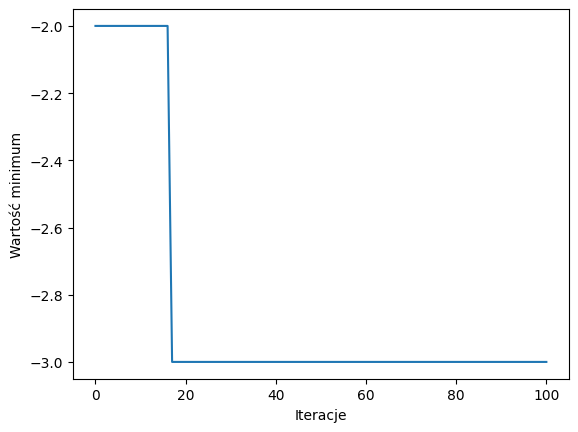

In [372]:
gen_alg(num_iterations=100,
        population_size=4,
        crossover_rate=0.01, 
        mutation_rate=0.08)

Najlepsza wartość genetyczna:  -5
Wartość f(x):  32


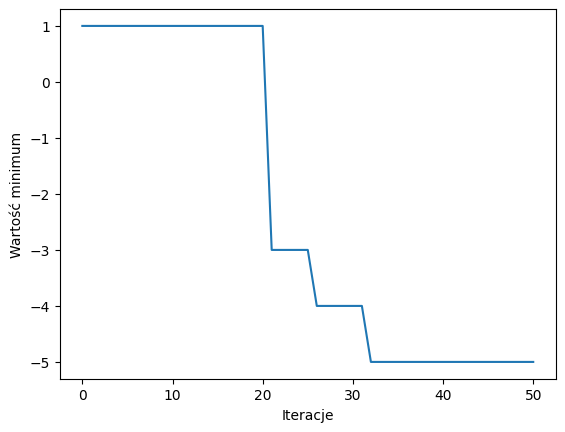

In [373]:
gen_alg(num_iterations=50,
        population_size=4,
        crossover_rate=0.1, 
        mutation_rate=0.8)